<a href="https://colab.research.google.com/github/atikaakter/Atika/blob/master/TensorFlow_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
import PIL
import PIL as image
import tensorflow as tf

In [4]:
print(tf.__version__)

2.12.0


In [7]:
import pathlib

In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 3s 0us/step


In [10]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


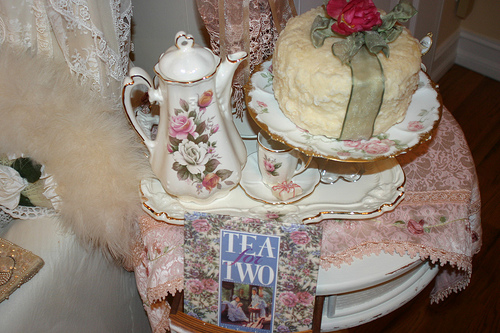

In [15]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

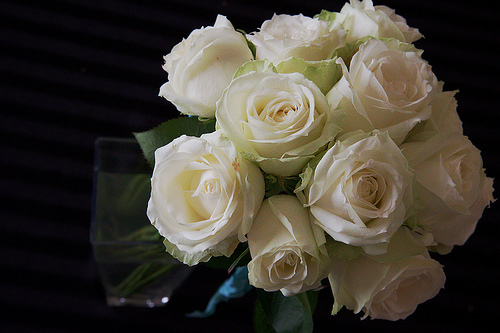

In [19]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[3]))

In [20]:
tf.keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [21]:
batch_size=32
img_height=180
img_weidth=180

In [30]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_weidth),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [51]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_weidth),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [52]:
class_name=train_ds.class_names
print(class_name)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


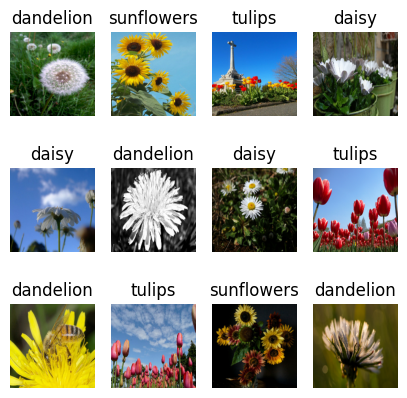

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for images, levels in train_ds.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[levels[i]])
    plt.axis("off")



In [109]:
tf.keras.layers.Rescaling
normaliztuon_layer= tf.keras.layers.Rescaling(1./255)

In [110]:
normaliztuon_layer

In [111]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [112]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
num_classes=5
model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [120]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accurracy '])


In [114]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3


ValueError: ignored